In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
import pandas as pd
df=pd.read_csv('D:/CCN/BoT-IoT-Dataset[3][N7-Small].csv')

In [3]:
#df.columns

In [4]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [5]:
X = df.drop('Sub_Cat',1)
y = df.Sub_Cat

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [7]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

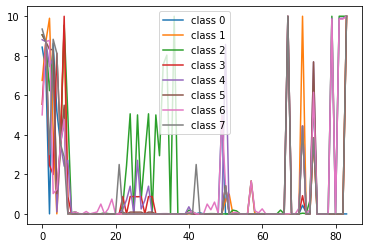

In [8]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [9]:
x_train.shape[0]

8411

In [10]:
x_train.shape[1]

84

In [11]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [12]:
x_test

array([[[9.04836191e+00],
        [8.71514868e+00],
        [9.69441621e+00],
        ...,
        [9.87111787e+00],
        [9.87111787e+00],
        [1.00000000e+01]],

       [[4.88278395e+00],
        [8.71514866e+00],
        [5.71969573e+00],
        ...,
        [9.85739483e+00],
        [9.85739483e+00],
        [1.00000000e+01]],

       [[6.07062086e+00],
        [8.71514866e+00],
        [6.24577855e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [1.00000000e+01]],

       ...,

       [[4.55673359e+00],
        [8.71514868e+00],
        [4.90671825e+00],
        ...,
        [9.87408153e+00],
        [1.03113858e-07],
        [0.00000000e+00]],

       [[9.04829744e+00],
        [8.71507958e+00],
        [6.73792583e+00],
        ...,
        [9.95712329e+00],
        [9.95712327e+00],
        [1.00000000e+01]],

       [[8.31842194e+00],
        [8.71514868e+00],
        [2.92337454e+00],
        ...,
        [0.00000000e+00],
        [0.0000

In [13]:
num_classes = len(np.unique(y_train))
num_classes

8

In [14]:
input_shape=x_train.shape[1:]
input_shape

(84, 1)

In [16]:
input_layer = keras.layers.Input(input_shape)

conv1 = keras.layers.Conv1D(filters=128, kernel_size=5, padding="same")(input_layer)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.ReLU()(conv1)
conv1 = keras.layers.Dropout(0.01)(conv1)



conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding="same")(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.ReLU()(conv2)
conv2 = keras.layers.Dropout(0.01)(conv2)

conv3 = keras.layers.Conv1D(filters=512, kernel_size=5, padding="same")(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.ReLU()(conv3)

gap = keras.layers.GlobalAveragePooling1D()(conv3)

output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)


In [17]:
import tensorflow as tf
model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()
tf.keras.utils.plot_model(model, 'multi_input.png', show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 84, 1)]           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 84, 128)           768       
_________________________________________________________________
batch_normalization_3 (Batch (None, 84, 128)           512       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 84, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 84, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 84, 256)           164096    
_________________________________________________________________
batch_normalization_4 (Batch (None, 84, 256)           1024  

In [18]:
epochs = 5
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=50, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

In [19]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"],)

In [20]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks, validation_split=0.30,verbose=1,)

Epoch 1/5
184/184 [==============================] - 52s 279ms/step - loss: 0.9091 - accuracy: 0.7149 - val_loss: 2.3137 - val_accuracy: 0.2801
Epoch 2/5
184/184 [==============================] - 48s 261ms/step - loss: 0.1809 - accuracy: 0.9496 - val_loss: 0.7357 - val_accuracy: 0.6945
Epoch 3/5
184/184 [==============================] - 58s 316ms/step - loss: 0.1146 - accuracy: 0.9681 - val_loss: 0.3707 - val_accuracy: 0.8554
Epoch 4/5
184/184 [==============================] - 56s 303ms/step - loss: 0.0902 - accuracy: 0.9780 - val_loss: 0.2326 - val_accuracy: 0.9255
Epoch 5/5
184/184 [==============================] - 50s 273ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 2.1477 - val_accuracy: 0.6644


In [21]:
pd.DataFrame(history.history).to_csv("D:/CCN/history.csv")

In [22]:
model.save_weights('/CCN/model_weights.h5')

In [34]:
model1 = load_trained_model("D:/CCN/best_model.h5")

In [ ]:
accuracy = history.history['accuracy']

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_pred1=np.argmax(model.predict(x_test), axis=-1)

In [ ]:
# Classification Report (precision, recall, f1-score)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1,digits=4) #y_test, y_pred
print(report)

In [ ]:
x_train_pred = model.predict(x_train)

In [ ]:
x_train_pred

In [ ]:
def plot_acc_loss(acc, loss, val_acc, val_loss):
    
    #Summarize history for accuracy
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylim(0.0, 1.05)
    plt.plot
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    #Summarize history for loss
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return None

In [ ]:
plot_acc_loss(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'])

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3')

In [ ]:
arr_reshaped = x_test.reshape(x_test.shape[0], -1) 

In [ ]:
np.savetxt("/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3/X_test.csv", arr_reshaped, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3/ytest.csv", y_test, delimiter=",")

In [ ]:
Accuracy_T=history.history['accuracy']
Accuracy_V=history.history['val_accuracy']
np.savetxt("/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3/Accuracy_T.csv", Accuracy_T, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3/Accuracy_V.csv", Accuracy_V, delimiter=",")
Loss_T=history.history['loss']
Loss_V=history.history['val_loss']
np.savetxt("/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3/Loss_T.csv", Loss_T, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/CNN/CNN_model_100Epoch_B64_Dataset_3/Loss_V.csv", Loss_V, delimiter=",")

In [ ]:
# Return the indices of maximum values along an axis (matching classes)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test1, y_pred2) 
cnf_matrix